In [1]:
%matplotlib inline

# Introduction

In `3_compare_classes.ipynb`, we found that the original correlation presented in [Dunham _et. al._ (2008)](https://ui.adsabs.harvard.edu/abs/2008ApJS..179..249D/abstract) degrades slightly for older (class 1) protostars, while in `4_optimal_wavelength.ipynb`, we introduced a wavelength range for observing protostellar targets, where the derived correlation between flux and internal luminosity remains sufficiently strong. However, in the years proceeding 2008, we've observed astronomers misuse the original 70 micron correlation, widely applying it to non-class 0 protostars. Hence, in this notebook, we aim to quantify the error introduced should one use the original correlation instead of our own. 

For clarity, we'll refer to the original correlation as `dfit` (a.k.a. Dunham's fit), and the updated correlation as `yfit` (a.k.a. Yek's fit).

# Import Dependencies

In [2]:
# System & OS
import warnings
warnings.filterwarnings('ignore')

# Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('darkgrid')

# Mount Storage

`cd` to the `data/` directory.

In [3]:
%cd '../data/'

/Users/zach/Documents/Python/Protostellar-Luminosity/data


# Feature Engineering

Read in our results from `2_linear_regression.ipynb`, only selecting the data closest to 70 microns.

In [4]:
# Read in linear coefficients
coef = pd.read_csv('lin_coef.csv', skiprows=1, names=['Class', 
                                                      'Wavelength (microns)', 
                                                      'Slope', 
                                                      'Unc_slope', 
                                                      'Intercept', 
                                                      'Unc_intercept'])
# Read in correlation metrics
corr = pd.read_csv('corr_coef.csv', skiprows=1, names=['Class', 
                                                       'Wavelength (microns)', 
                                                       'Reduced chi-squared (linear space)', 
                                                       'Reduced chi-squared (log10 space)', 
                                                       'Correlation coefficient (linear space)', 
                                                       'Correlation coefficient (log10 space)'])

# Merge the two dataframes along the class and wavelength columns
df = pd.merge(coef, corr, on=['Class', 'Wavelength (microns)'])
# Drop the rows with all wavelengths
df.drop(index=[400, 401, 402, 403], inplace=True)
# Typecast wavelength column to float
df['Wavelength (microns)'] = df['Wavelength (microns)'].apply(lambda x: float(x))
# Retrive rows with wavelength closest to 70 microns
df = df[np.isclose(df['Wavelength (microns)'], 7.35706025e+01)]
df

,Class,Wavelength (microns),Slope,Unc_slope,Intercept,Unc_intercept,Reduced chi-squared (linear space),Reduced chi-squared (log10 space),Correlation coefficient (linear space),Correlation coefficient (log10 space)
104,0,73.570602,0.991177,0.001600,-9.123577,0.002088,nan,-28.963521,0.919712,0.982471
105,1a,73.570602,1.051372,0.002000,-9.460327,0.002296,nan,-165.302103,0.856317,0.945712
106,1b,73.570602,1.022947,0.001951,-9.593142,0.001472,nan,-127.579043,0.965017,0.945657
107,All,73.570602,1.107987,0.001333,-9.520574,0.001383,nan,-514.076791,0.797523,0.947305


Also load the results from `1_model_analysis.ipynb` closest to 70 microns.

In [5]:
ndarray = np.load('70_micron_data.npy', allow_pickle=True)
data = pd.DataFrame(ndarray, columns=['Class', 'Wavelength (microns)', 'Flux', 'L_int'])
data

,Class,Wavelength (microns),Flux,L_int
0,0,73.570602,0.0,2.0869
1,0,73.570602,0.0,2.0869
2,0,73.570602,0.0,2.0869
3,0,73.570602,0.0,2.0869
4,0,73.570602,0.0,2.0869
...,...,...,...,...
78960,1b,73.570602,0.0,5.9644
78961,1b,73.570602,0.0,5.9644
78962,1b,73.570602,0.0,5.9644
78963,1b,73.570602,0.0,5.9644


# Data Analysis

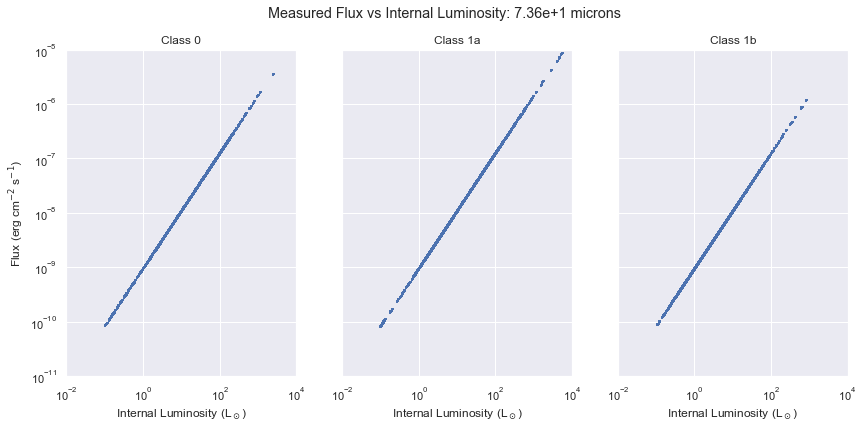

In [6]:
# Create 3-figure plot
fig, ax = plt.subplots(1, 3, figsize=(14, 6), sharey=True)
# Set title
fig.suptitle('Measured Flux vs Internal Luminosity: 7.36e+1 microns')
# Customize shared y-axis
ax[0].set_ylabel('Flux (erg cm$^{-2}$ s$^{-1}$)')
ax[0].set_yscale('log')
ax[0].set_ylim([1e-11, 1e-5])
# Map class name to subplot position
class_map = {'0': 0, '1a': 1, '1b': 2}
for class_name in class_map:
    # Extract internal luminosity data for this class
    x = data[data['Class'] == class_name]['L_int']
    # Compute measured flux from Dunham's fit
    m, b = 1.06, -9.02
    y = 10**b * x**m
    # Plot data
    index = class_map[class_name]
    ax[index].scatter(x, y, s=9, marker='+')
    # Customize subplot
    ax[index].set_title(f'Class {class_name}')
    ax[index].set_xlabel('Internal Luminosity (L$_\odot$)')
    ax[index].set_xscale('log')
    ax[index].set_xlim([1e-2, 1e4])
# Save figure
plt.savefig(f'Figures/dfit.eps', format='eps', dpi=1200)
plt.savefig(f'../src/images/dfit.jpg', format='jpg')
plt.show()

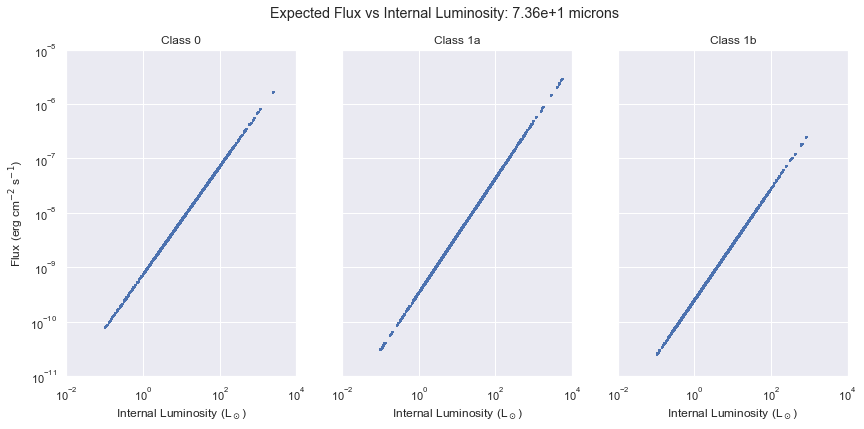

In [7]:
# Create 3-figure plot
fig, ax = plt.subplots(1, 3, figsize=(14, 6), sharey=True)
# Set title
fig.suptitle('Expected Flux vs Internal Luminosity: 7.36e+1 microns')
# Customize shared y-axis
ax[0].set_ylabel('Flux (erg cm$^{-2}$ s$^{-1}$)')
ax[0].set_yscale('log')
ax[0].set_ylim([1e-11, 1e-5])
# Map class name to subplot position
class_map = {'0': 0, '1a': 1, '1b': 2}
for class_name in class_map:
    # Extract internal luminosity data for this class
    x = data[data['Class'] == class_name]['L_int']
    # Extract linear coefficients for this class
    m, b = df[df['Class'] == class_name]['Slope'].values[0], df[df['Class'] == class_name]['Intercept'].values[0]
    # Compute expected flux from linear fit
    y = 10**b * x**m
    # Plot data
    index = class_map[class_name]
    ax[index].scatter(x, y, s=9, marker='+')
    # Customize subplot
    ax[index].set_title(f'Class {class_name}')
    ax[index].set_xlabel('Internal Luminosity (L$_\odot$)')
    ax[index].set_xscale('log')
    ax[index].set_xlim([1e-2, 1e4])
# Save figure
plt.savefig(f'Figures/yfit.eps', format='eps', dpi=1200)
plt.savefig(f'../src/images/yfit.jpg', format='jpg')
plt.show()

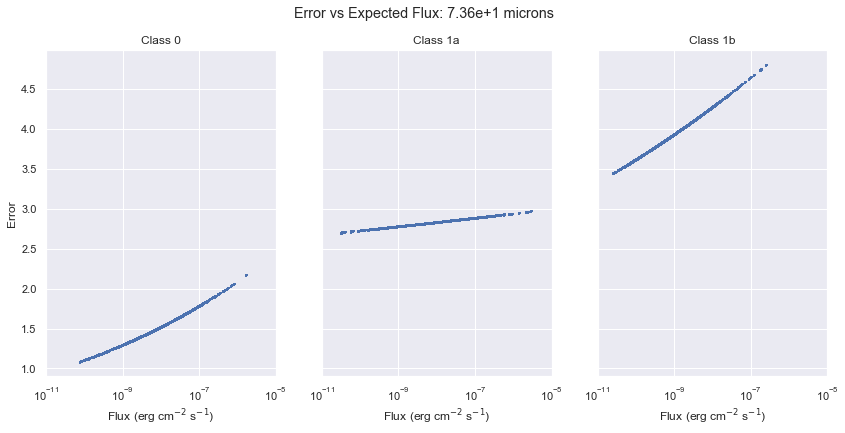

In [8]:
# Create 3-figure plot
fig, ax = plt.subplots(1, 3, figsize=(14, 6), sharey=True)
# Set title
fig.suptitle('Error vs Expected Flux: 7.36e+1 microns')
# Customize shared y-axis
ax[0].set_ylabel('Error')
# Map class name to subplot position
class_map = {'0': 0, '1a': 1, '1b': 2}
for class_name in class_map:
    # Extract internal luminosity data for this class
    x = data[data['Class'] == class_name]['L_int']
    # Extract linear coefficients for this class
    m, b = df[df['Class'] == class_name]['Slope'].values[0], df[df['Class'] == class_name]['Intercept'].values[0]
    # Compute expected flux from linear fit
    yfit = 10**b * x**m
    # Compute measured flux from Dunham's fit
    dfit = 10**-9.02 * x**1.06
    # Calculate error
    error = dfit / yfit
    # Plot data
    index = class_map[class_name]
    ax[index].scatter(yfit, error, s=9, marker='+')
    # Customize subplot
    ax[index].set_title(f'Class {class_name}')
    ax[index].set_xlabel('Flux (erg cm$^{-2}$ s$^{-1}$)')
    ax[index].set_xscale('log')
    ax[index].set_xlim([1e-11, 1e-5])
# Save figure
plt.savefig(f'Figures/error.eps', format='eps', dpi=1200)
plt.savefig(f'../src/images/error.jpg', format='jpg')
plt.show()